In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read data

<p> Latest confirmed data


In [39]:
df_all_data= pd.read_csv('2019_nCoV_20200121_20200129.csv')
df_all_data.head()

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Hubei,Mainland China,1/29/2020 21:00,4586.0,NaN,90.0,162.0
1,Zhejiang,Mainland China,1/29/2020 21:00,428.0,NaN,4.0,NaN
2,Guangdong,Mainland China,1/29/2020 21:00,311.0,NaN,6.0,NaN
3,Henan,Mainland China,1/29/2020 21:00,278.0,NaN,2.0,2.0
4,Hunan,Mainland China,1/29/2020 21:00,277.0,NaN,NaN,NaN


In [40]:
df_all_data.shape

(883, 7)

In [41]:
df_all_data.isnull().sum()

Province/State    170
Country/Region      0
Last Update         0
Confirmed          30
Suspected         795
Recovered         729
Death             789
dtype: int64

In [42]:
df_all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 7 columns):
Province/State    713 non-null object
Country/Region    883 non-null object
Last Update       883 non-null object
Confirmed         853 non-null float64
Suspected         88 non-null float64
Recovered         154 non-null float64
Death             94 non-null float64
dtypes: float64(4), object(3)
memory usage: 48.4+ KB


# Prepare Data

# Rename Countries

In [43]:
df_all_data.replace('Mainland China', 'China', inplace=True)
df_all_data.replace('Hong Kong', 'China', inplace=True)
df_all_data.replace('Macau', 'China', inplace=True)

# Handle NaNs

In [44]:
df_all_data['Province/State'].fillna('Unknown', inplace=True)
df_all_data['Suspected'].fillna(0, inplace=True)
df_all_data['Recovered'].fillna(0, inplace=True)
df_all_data['Death'].fillna(0, inplace=True)

In [45]:
df_all_data['Last Update'].unique()

array(['1/29/2020 21:00', '1/29/2020 14:30', '1/29/2020 13:30',
       '1/28/2020 23:00', '1/28/2020 18:00', '1/28/2020 13:00',
       '1/27/2020 20:30', '1/27/2020 19:00', '1/27/2020 9:00',
       '1/26/2020 23:00', '1/26/2020 11:00 AM', '1/25/2020 10:00 PM',
       '1/25/2020 12:00 PM', '1/25/2020 12:00 AM', '1/24/2020 12:00 PM',
       '1/24/2020 4:00 PM', '1/24/2020 12:00 AM', '1/23/20 12:00 PM',
       '1/22/2020 12:00', '1/21/2020'], dtype=object)

In [46]:
df_all_data['Last Update'].max()

'1/29/2020 21:00'

Get last updated data

In [47]:
df_latest_data = df_all_data[df_all_data['Last Update'] == df_all_data['Last Update'].max()]

In [48]:
df_latest_data.shape

(56, 7)

In [49]:
df_latest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 7 columns):
Province/State    56 non-null object
Country/Region    56 non-null object
Last Update       56 non-null object
Confirmed         56 non-null float64
Suspected         56 non-null float64
Recovered         56 non-null float64
Death             56 non-null float64
dtypes: float64(4), object(3)
memory usage: 3.5+ KB


In [50]:
df_latest_data['Country/Region'].unique()

array(['China', 'Taiwan', 'United States', 'Japan', 'Thailand',
       'South Korea', 'Singapore', 'Vietnam', 'France', 'Nepal',
       'Malaysia', 'Canada', 'Cambodia', 'Sri Lanka', 'Australia',
       'Germany', 'Finland', 'United Arab Emirates'], dtype=object)

In [51]:
df_latest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 7 columns):
Province/State    56 non-null object
Country/Region    56 non-null object
Last Update       56 non-null object
Confirmed         56 non-null float64
Suspected         56 non-null float64
Recovered         56 non-null float64
Death             56 non-null float64
dtypes: float64(4), object(3)
memory usage: 3.5+ KB


# Group Data

In [52]:
def convert_last_update_date_format(x):
    return pd.to_datetime(x.split(' ')[0])

In [53]:
df_all_data['Last Update'] = df_all_data['Last Update'].apply(convert_last_update_date_format)

In [54]:
df_all_data_by_date = df_all_data.groupby(['Last Update']).sum().reset_index()
df_all_data_by_date

,Last Update,Confirmed,Suspected,Recovered,Death
0,2020-01-21,332.0,169.0,0.0,0.0
1,2020-01-22,555.0,137.0,0.0,0.0
2,2020-01-23,653.0,144.0,30.0,18.0
3,2020-01-24,1822.0,274.0,70.0,52.0
4,2020-01-25,4811.0,883.0,126.0,139.0
5,2020-01-26,4910.0,383.0,106.0,136.0
6,2020-01-27,10286.0,0.0,183.0,270.0
7,2020-01-28,16325.0,0.0,296.0,369.0
8,2020-01-29,20112.0,0.0,371.0,435.0


In [55]:
df_latest_data_by_country = df_latest_data.groupby(['Country/Region']).agg('sum').reset_index()
df_latest_data_by_country

,Country/Region,Confirmed,Suspected,Recovered,Death
0,Australia,7.0,0.0,0.0,0.0
1,Cambodia,1.0,0.0,0.0,0.0
2,Canada,3.0,0.0,0.0,0.0
3,China,7695.0,0.0,127.0,170.0
4,Finland,1.0,0.0,0.0,0.0
5,France,5.0,0.0,0.0,0.0
6,Germany,4.0,0.0,0.0,0.0
7,Japan,11.0,0.0,1.0,0.0
8,Malaysia,7.0,0.0,0.0,0.0
9,Nepal,1.0,0.0,0.0,0.0


In [56]:
df_latest_data_by_state = df_latest_data.groupby(['Province/State']).agg('sum').reset_index()
df_latest_data_by_state

,Province/State,Confirmed,Suspected,Recovered,Death
0,Anhui,200.0,0.0,2.0,0.0
1,Arizona,1.0,0.0,0.0,0.0
2,Bavaria,4.0,0.0,0.0,0.0
3,Beijing,111.0,0.0,4.0,1.0
4,British Columbia,1.0,0.0,0.0,0.0
5,California,2.0,0.0,0.0,0.0
6,China,17.0,0.0,0.0,0.0
7,Chongqing,165.0,0.0,1.0,0.0
8,Fujian,101.0,0.0,0.0,0.0
9,Gansu,26.0,0.0,0.0,0.0


# Data Visualization

Text(0.5,1,'Country wise confirmed cases')

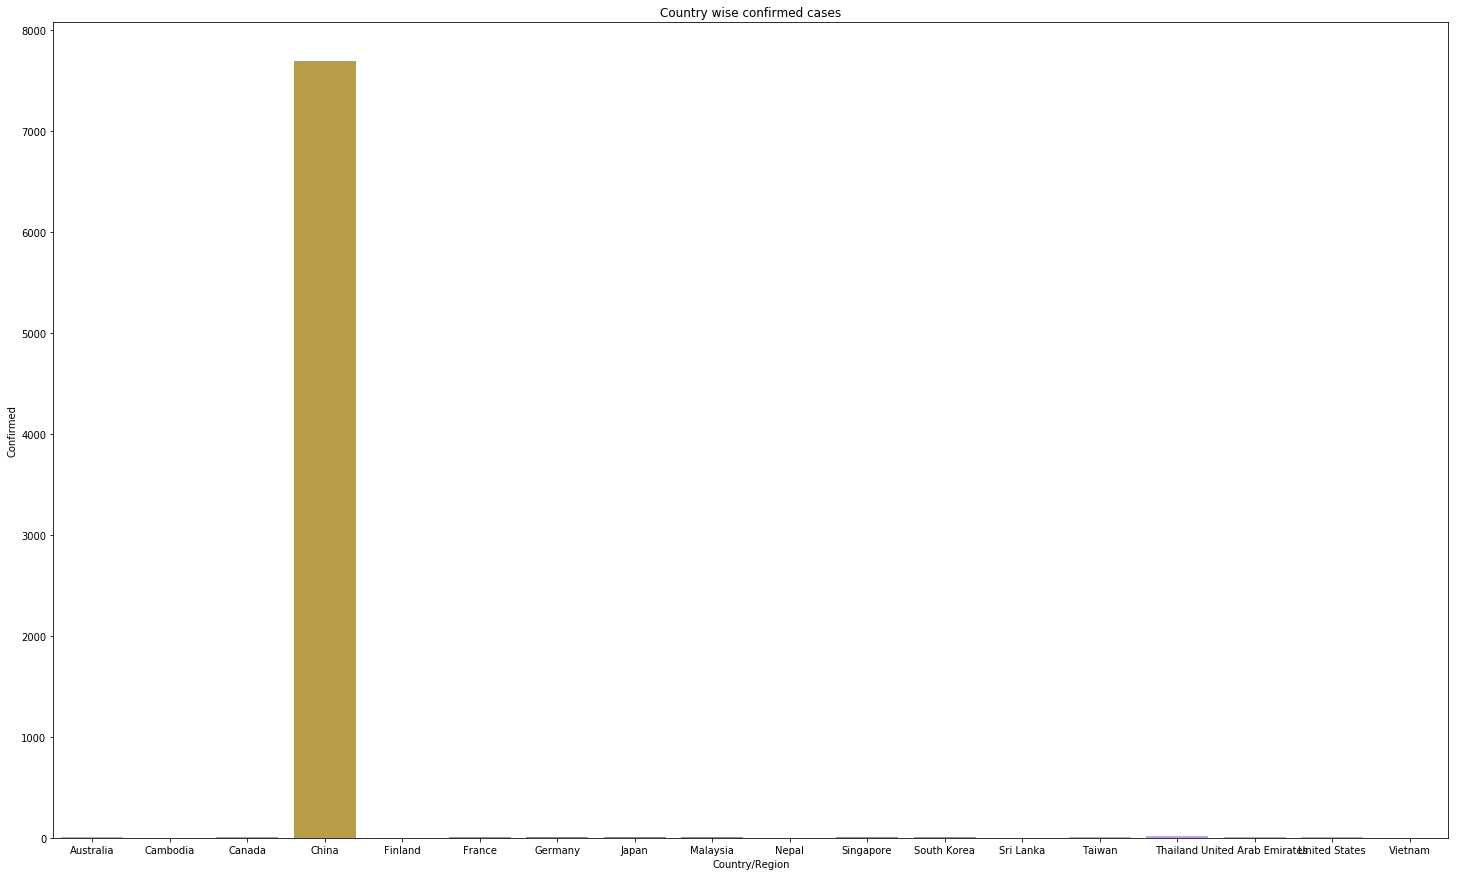

In [57]:
plt.figure(figsize=(25,15))
sns.barplot(x='Country/Region', y='Confirmed', data = df_latest_data_by_country)
plt.title('Country wise confirmed cases')

Text(0.5,1,'State-wise death rates')

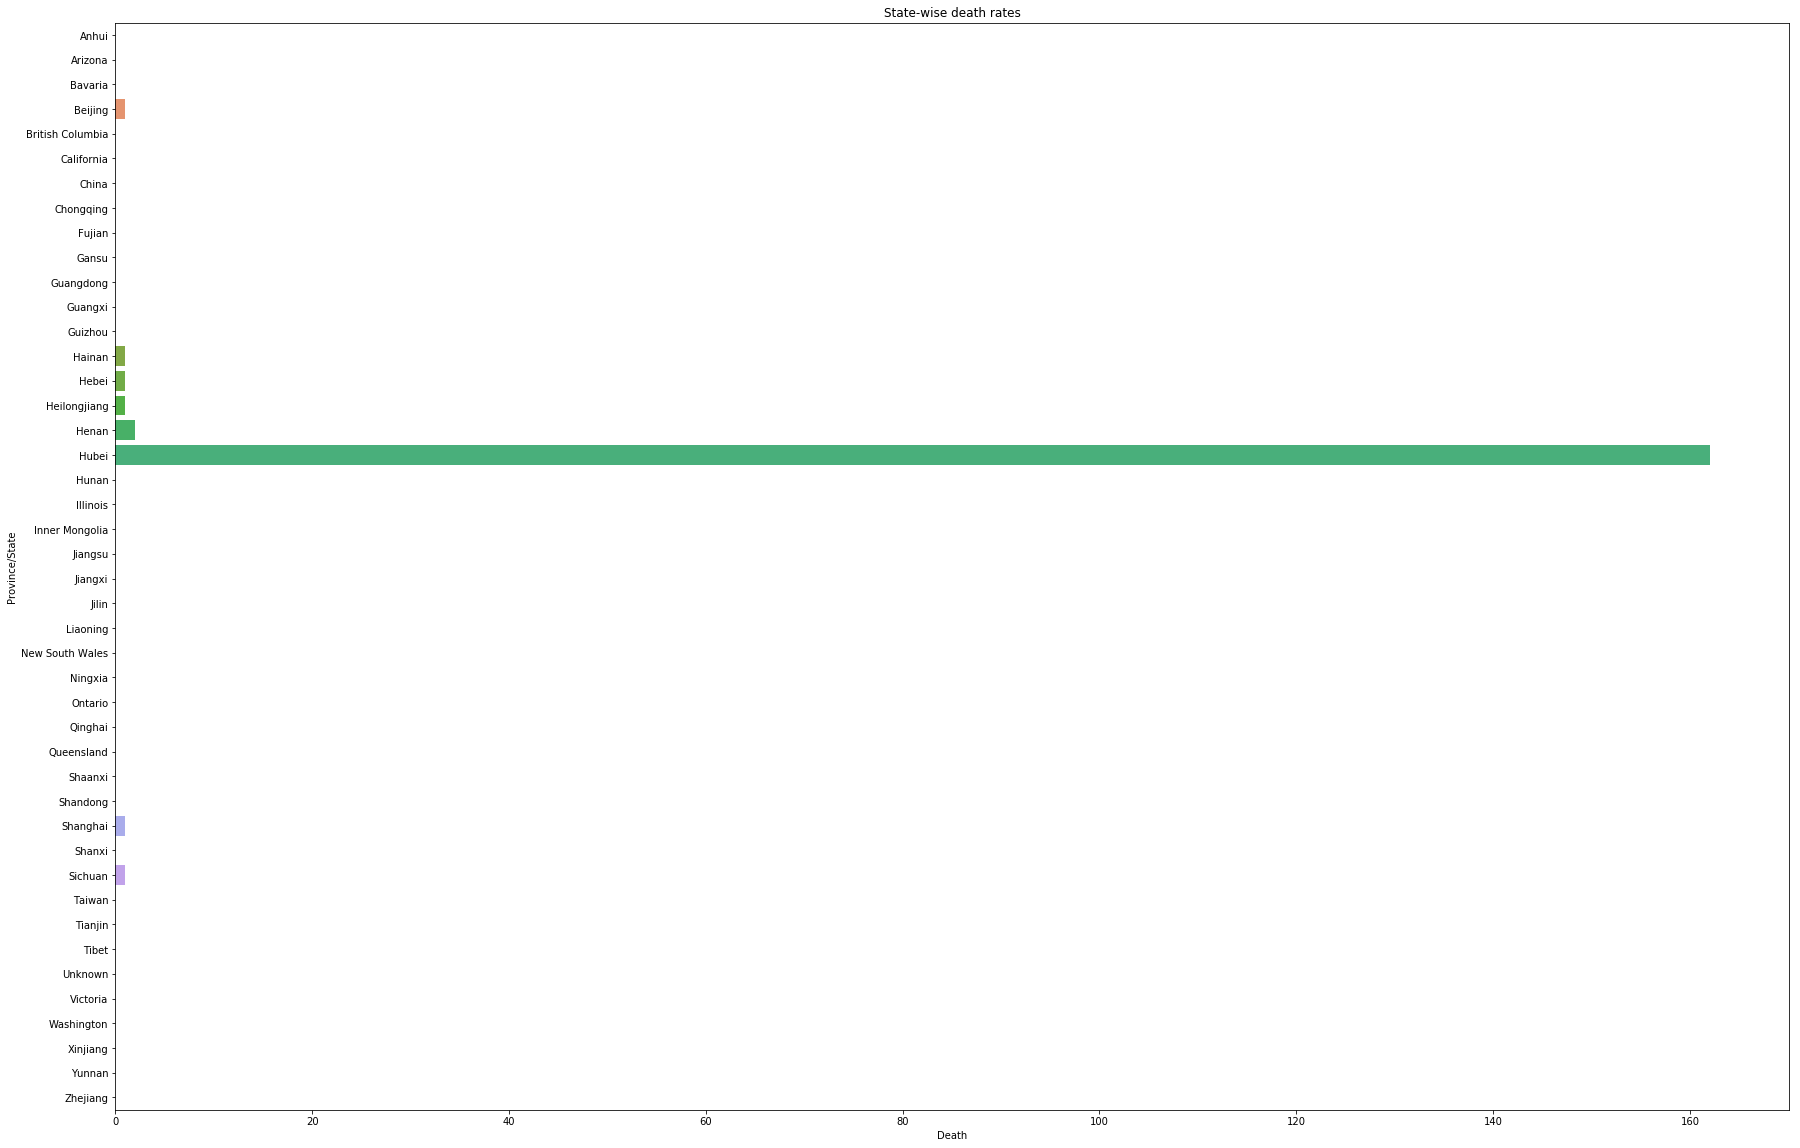

In [58]:
plt.figure(figsize=(30,20))
sns.barplot(x='Death', y='Province/State', data = df_latest_data_by_state)
plt.title('State-wise death rates')

Text(0.5,1,'State-wise confirmed cases')

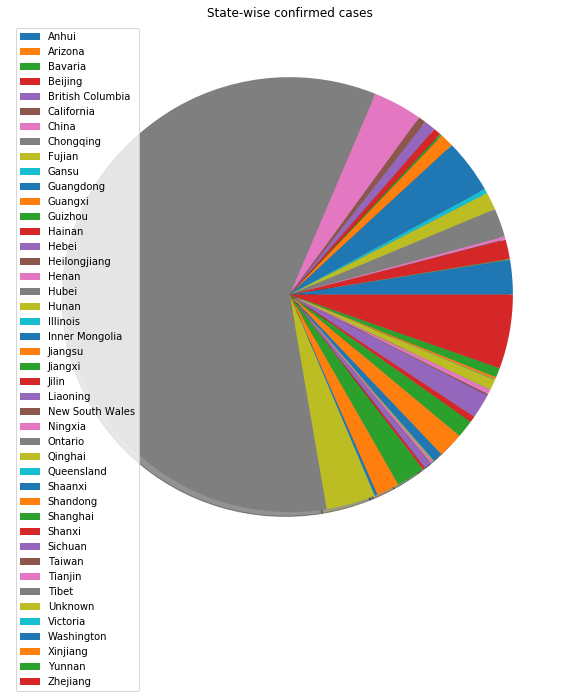

In [59]:
plt.figure(figsize = (10,10))
pie = plt.pie(df_latest_data_by_state['Confirmed'], shadow=True)
plt.legend(df_latest_data_by_state['Province/State'], loc = 0)
plt.title('State-wise confirmed cases')

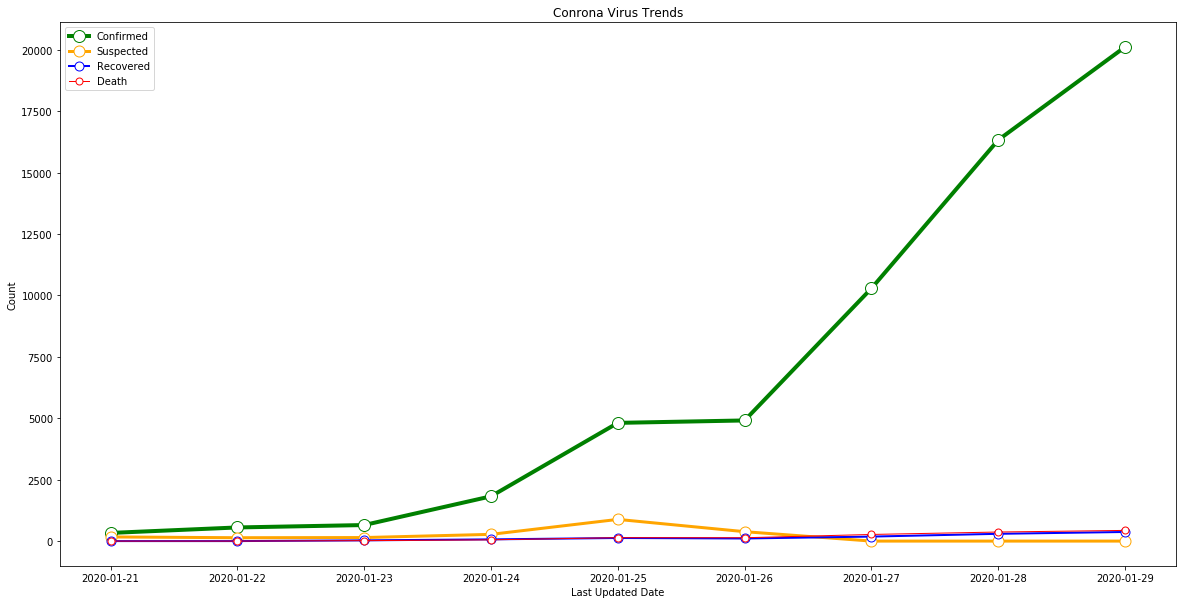

In [60]:
plt.figure(figsize=(20,10))
plt.plot( 'Last Update', 'Confirmed', data=df_all_data_by_date, marker='o', markerfacecolor='white', markersize=12, color='green', linewidth=4)
plt.plot( 'Last Update', 'Suspected', data=df_all_data_by_date, marker='o', markerfacecolor='white', markersize=11, color='orange', linewidth=3)
plt.plot( 'Last Update', 'Recovered', data=df_all_data_by_date, marker='o', markerfacecolor='white', markersize=9, color='blue', linewidth=2)
plt.plot( 'Last Update', 'Death', data=df_all_data_by_date, marker='o', markerfacecolor='white', markersize=7, color='red', linewidth=1)
plt.title('Conrona Virus Trends')
plt.xlabel('Last Updated Date')
plt.ylabel('Count')
plt.legend()


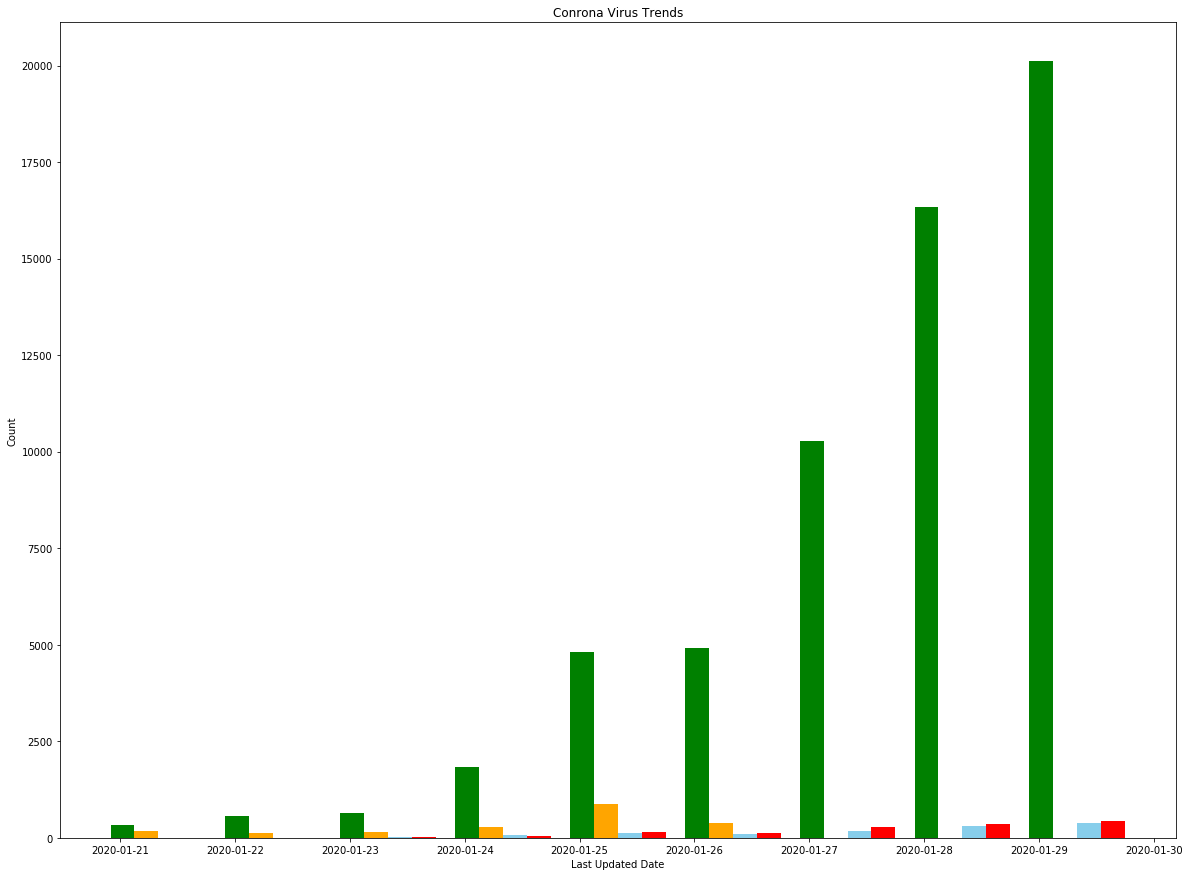

In [61]:
plt.figure(figsize=(20,15))
plt.bar(df_all_data_by_date['Last Update'], df_all_data_by_date['Confirmed'], width=np.timedelta64(5, 'h'), color='green')
plt.bar(df_all_data_by_date['Last Update']+np.timedelta64(5, 'h'), df_all_data_by_date['Suspected'], width=np.timedelta64(5, 'h'), color='orange')
plt.bar(df_all_data_by_date['Last Update']+np.timedelta64(10, 'h'), df_all_data_by_date['Recovered'], width=np.timedelta64(5, 'h'), color='skyblue')
plt.bar(df_all_data_by_date['Last Update']+np.timedelta64(15, 'h'), df_all_data_by_date['Death'], width=np.timedelta64(5, 'h'), color='red')
plt.title('Conrona Virus Trends')
plt.xlabel('Last Updated Date')
plt.ylabel('Count')
plt.show()

In [62]:
df_all_data.head()

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Hubei,China,2020-01-29,4586.0,0.0,90.0,162.0
1,Zhejiang,China,2020-01-29,428.0,0.0,4.0,0.0
2,Guangdong,China,2020-01-29,311.0,0.0,6.0,0.0
3,Henan,China,2020-01-29,278.0,0.0,2.0,2.0
4,Hunan,China,2020-01-29,277.0,0.0,0.0,0.0


Text(0,0.5,'Count')

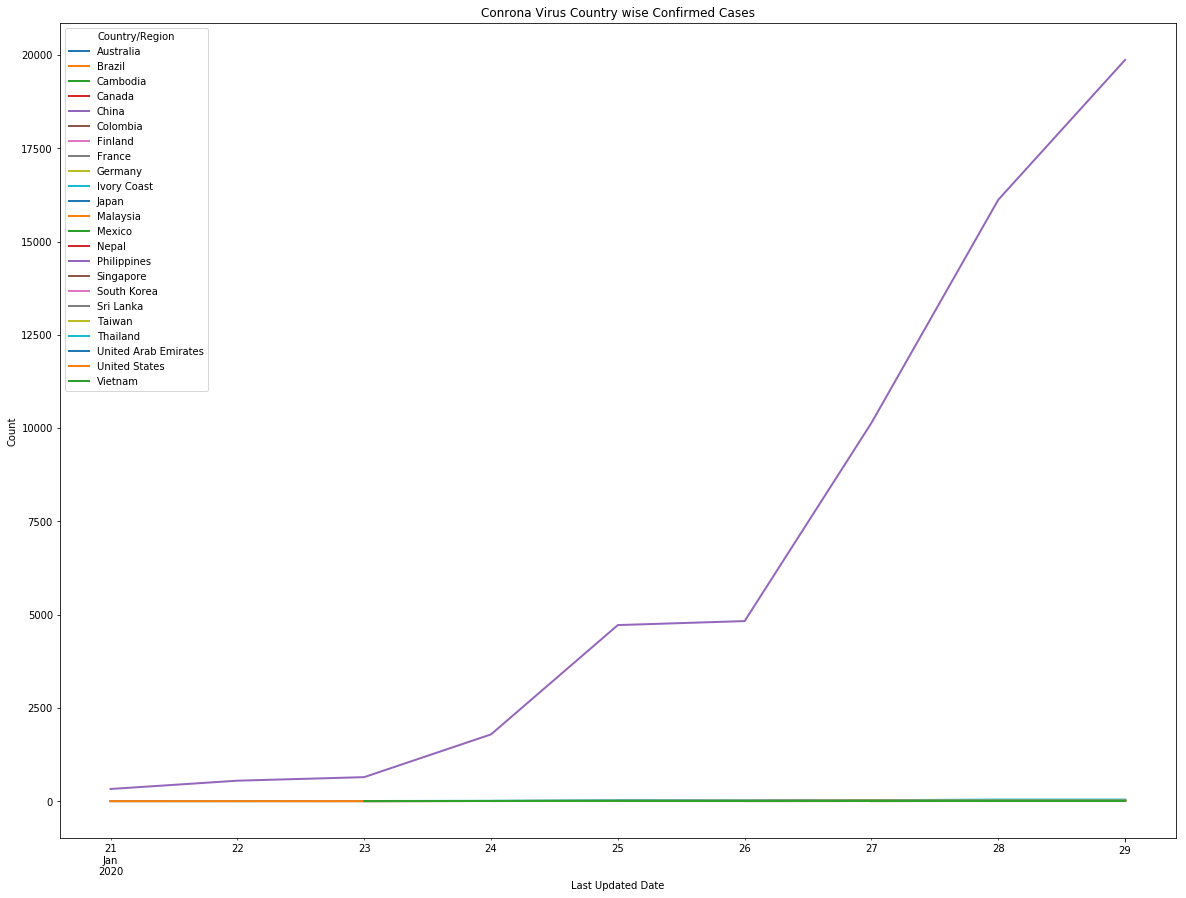

In [70]:
fig= df_all_data.groupby(['Last Update','Country/Region'])['Confirmed'].sum().unstack().plot(figsize=(20,15),linewidth=2)
fig.set_title('Conrona Virus Country wise Confirmed Cases')
fig.set_xlabel('Last Updated Date')
fig.set_ylabel('Count')

<h5> Not the end. Will update whenever new data is available.